Circuit Summary:

Results (Target state was 1): {'00000': 1000}


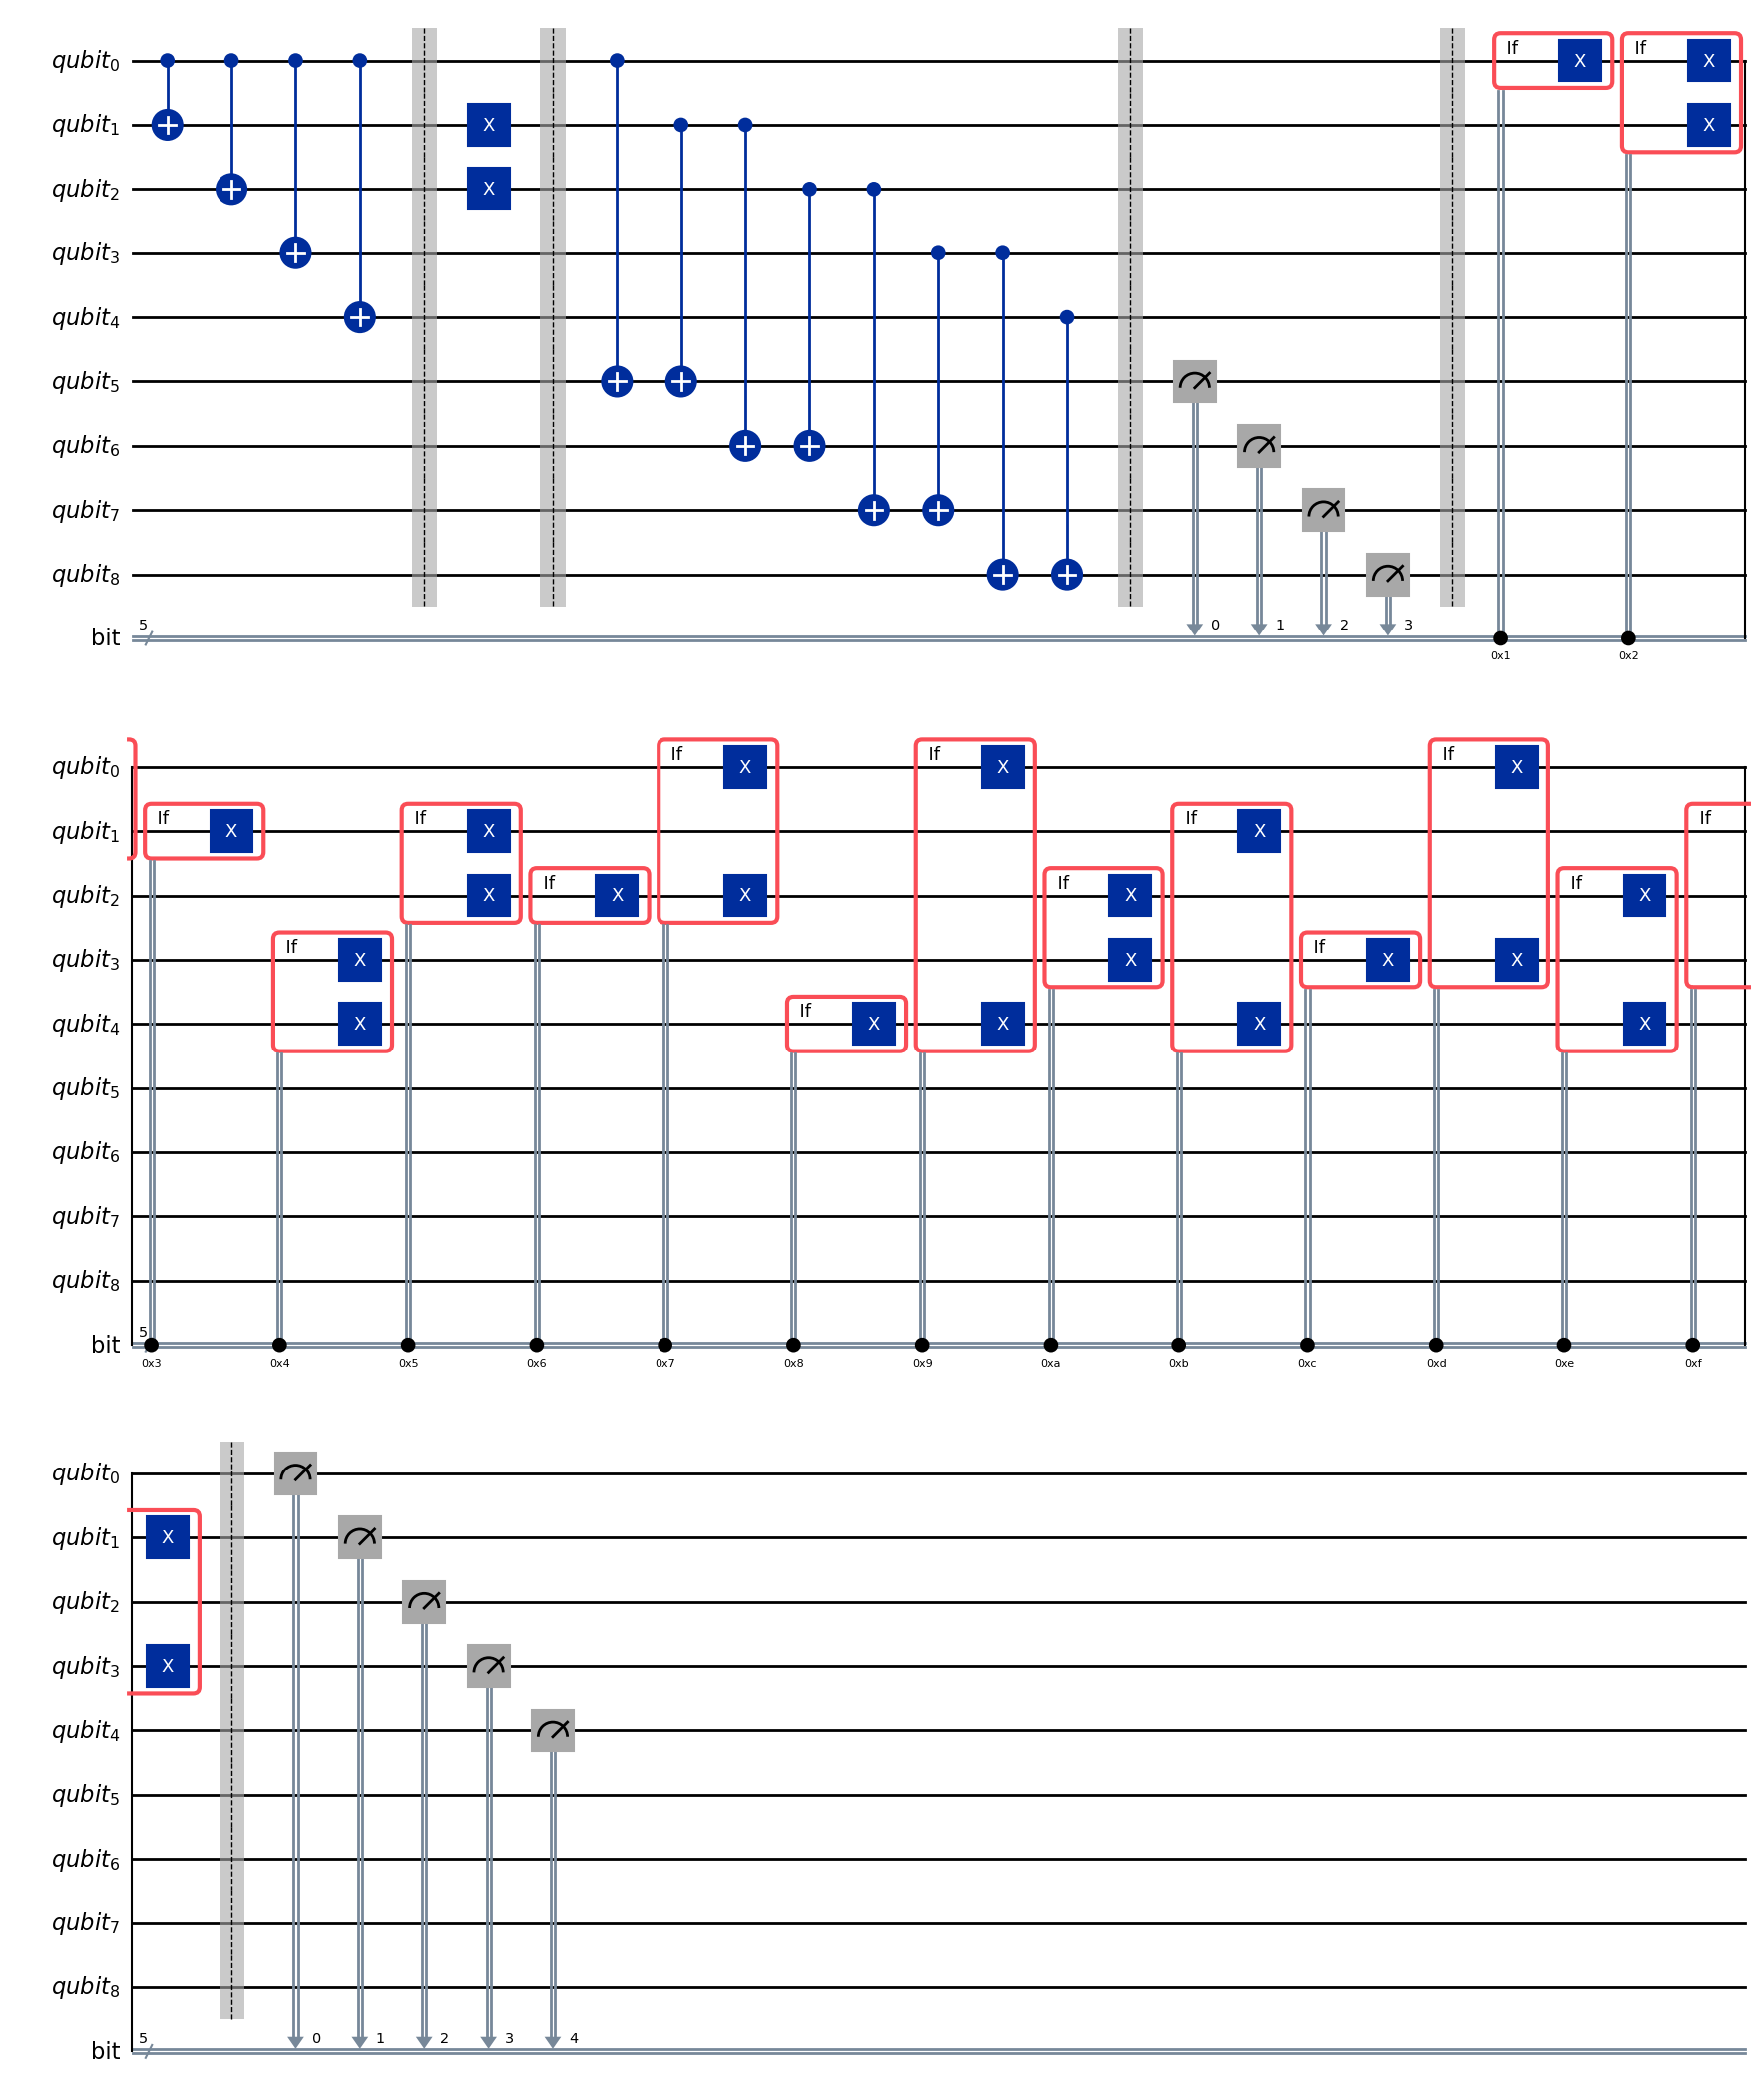

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer

# 1. Setup Registers
# We use 5 qubits for the code, 4 ancilla qubits, 4 ancilla classical bits, and 4 + 1 classical bits for the result
q = QuantumRegister(9, 'qubit')
c = ClassicalRegister(5, 'bit')
qc = QuantumCircuit(q, c)

# You can also play with the following
# qc.x(q[0]) sets initial state to |1>
# qc.h(q[0]) sets initial state to (|0> + |1>) / sqrt(2)

# --- STEP 1: ENCODING ---
# Spread the state to qubit 1 and 2 (Encoding |1> into |11111>)
qc.cx(q[0], q[1])
qc.cx(q[0], q[2])
qc.cx(q[0], q[3])
qc.cx(q[0], q[4])
qc.barrier()

# --- STEP 2: INTRODUCE ERROR ---
# We simulate an error by flipping qubit 1. 
# You can change this to q[0] or q[2] and the code will still work!
qc.x(q[1]) 
qc.x(q[2])
qc.barrier()

# --- STEP 3: DETECTION & CORRECTION ---
# Heart of the correction code
qc.cx(q[0], q[5])
qc.cx(q[1], q[5])
qc.cx(q[1], q[6])
qc.cx(q[2], q[6])
qc.cx(q[2], q[7])
qc.cx(q[3], q[7])
qc.cx(q[3], q[8])
qc.cx(q[4], q[8])
qc.barrier()

qc.measure(q[5], c[0])
qc.measure(q[6], c[1])
qc.measure(q[7], c[2])
qc.measure(q[8], c[3])
qc.barrier()

# Flip first qubit if c = 0001
with qc.if_test((c, 1)):
    qc.x(q[0])

# Flip first and second qubit if c = 0010
with qc.if_test((c, 2)): 
    qc.x(q[0])
    qc.x(q[1])

# Flip second qubit if c = 0011
with qc.if_test((c, 3)):
    qc.x(q[1])

# Flip fourth and fifth qubits if c = 0100
with qc.if_test((c, 4)):
    qc.x(q[3])
    qc.x(q[4])

# Flip fourth and fifth qubit if c = 0101
with qc.if_test((c, 5)):
    qc.x(q[1])
    qc.x(q[2])

# Flip fourth and fifth qubit if c = 0110
with qc.if_test((c, 6)):
    qc.x(q[2])

# Flip fourth and fifth qubit if c = 0111
with qc.if_test((c, 7)):
    qc.x(q[0])
    qc.x(q[2])

# Flip fourth and fifth qubit if c = 1000
with qc.if_test((c, 8)):
    qc.x(q[4])

# Flip fourth and fifth qubit if c = 1001
with qc.if_test((c, 9)):
    qc.x(q[0])
    qc.x(q[4])

# Flip fourth and fifth qubit if c = 1010
with qc.if_test((c, 10)):
    qc.x(q[2])
    qc.x(q[3])

# Flip fourth and fifth qubit if c = 1011
with qc.if_test((c, 11)):
    qc.x(q[1])
    qc.x(q[4])

# Flip fourth and fifth qubit if c = 1100
with qc.if_test((c, 12)):
    qc.x(q[3])

# Flip fourth and fifth qubit if c = 1101
with qc.if_test((c, 13)):
    qc.x(q[0])
    qc.x(q[3])

# Flip fourth and fifth qubit if c = 1110
with qc.if_test((c, 14)):
    qc.x(q[2])
    qc.x(q[4])

# Flip fourth and fifth qubit if c = 1111
with qc.if_test((c, 15)):
    qc.x(q[1])
    qc.x(q[3])
qc.barrier()

# --- STEP 4: MEASUREMENT ---
# We measure the corrected logical qubits
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])
qc.measure(q[4], c[4])

# --- EXECUTION ---
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print("Circuit Summary:")
# print(qc.draw(output='text'))
print(f"\nResults (Target state was 1): {counts}")
qc.draw("mpl")